# Pycity Schools Analysis
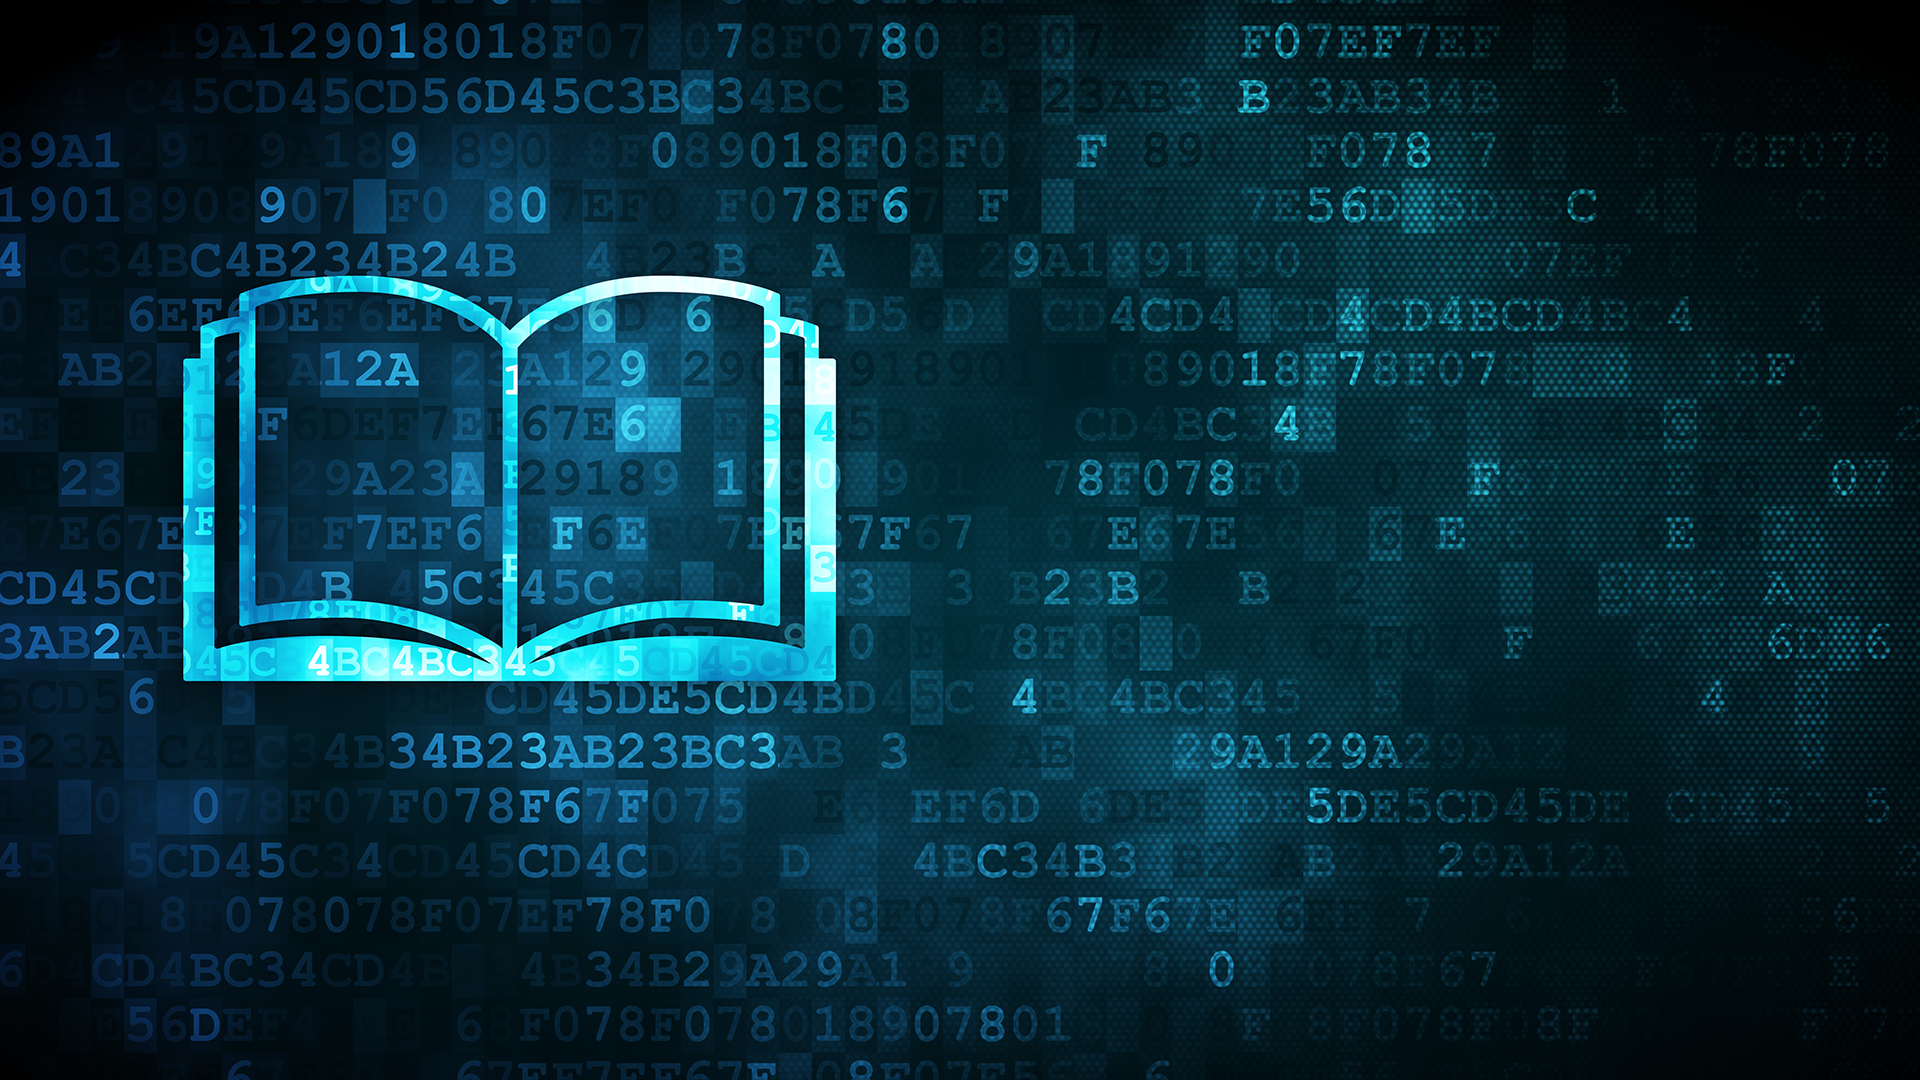


##### The data sets consists of 15 schools with 39,170 students. The total budget for the district is just over 24.5 million dollars. 
##### Just looking at the district data, it is apparent that the percent of students passing both math and reading is lower than the average scores of math and reading individually.
##### The average math score is lower than the reading score, indicating that more resources should be focused on improving the students math skills.

##### The data was mined to the school level with additional insight to the performance of the students on the math and reading scores.
##### Eight of the 15 schools are charter schools and 7 are district schools. 
##### The top five performing schools by overall % passing are all charter schools with a range of 90% - 91%. 
##### The bottom 5 performing schools by overall % passing are district schools with a range of 52% - 53%.
##### The charter schools tended to have small to medium size student populations with only one considered large at 2,283 students. 
##### All of the district schools had large student populations with the smallest district school having a total of 2,739 students. 

##### The outcome of the data analysis indicates that the size of the school has the greater impact on students reading and math scores. 

In [1]:
import pandas as pd
from pathlib import Path

#Load data files
school_data_to_load = Path("Resources/schools_complete.csv")
student_data_to_load = Path("Resources/students_complete.csv")

#Read data files and store into Pandas dataframes
school_data_df = pd.read_csv(school_data_to_load)
student_data_df = pd.read_csv(student_data_to_load)

#Combine the data into a single dataset.  
school_data_complete = pd.merge(student_data_df, school_data_df, how="left", on=["school_name", "school_name"])
school_data_complete.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


## District Summary

In [2]:
# Calculate the total number of unique schools
school_count = len(school_data_complete["School ID"].unique())
school_count

15

In [3]:
# Calculate the total number of students
student_count = school_data_complete["Student ID"].count()
student_count

39170

In [4]:
# Calculate the total budget
total_budget = school_data_complete["budget"].unique().sum()
total_budget

24649428

In [5]:
# Calculate the average (mean) math score
average_math_score = school_data_complete["math_score"].mean()
average_math_score

78.98537145774827

In [6]:
# Calculate the average (mean) reading score
average_reading_score = school_data_complete["reading_score"].mean()
average_reading_score

81.87784018381414

In [7]:
# Calculate the percentage of students who passed math (math scores greather than or equal to 70)
passing_math_count = school_data_complete[(school_data_complete["math_score"] >= 70)].count()["student_name"]
passing_math_percentage = passing_math_count / float(student_count) * 100
passing_math_percentage

74.9808526933878

In [8]:
# Calculate the percentage of students who passed reading (hint: look at how the math percentage was calculated)  
passing_reading_count = school_data_complete[(school_data_complete["reading_score"] >= 70)].count()["student_name"]
passing_reading_percentage = passing_reading_count /float(student_count) * 100
passing_reading_percentage

85.80546336482001

In [9]:
# Calculate the percentage of students that passed math and reading
passing_math_reading_count = school_data_complete[(school_data_complete
                           ["math_score"] >= 70) & (school_data_complete["reading_score"] >= 70)].count()["student_name"]
overall_passing_rate = passing_math_reading_count /  float(student_count) * 100
overall_passing_rate

65.17232575950983

In [10]:
# Create a high-level snapshot of the district's key metrics in a DataFrame
district_summary = {"Total Schools": school_count,
                    "Total Students": student_count,
                    "Total Budget": total_budget,
                    "Average Math Score": average_math_score,
                    "Average Reading Score": average_reading_score,
                    "% Passing Math": passing_math_percentage,
                    "% Passing Reading": passing_reading_percentage,
                    "% Overall Passing": overall_passing_rate}

# Create a DataFrame from the dictionary
district_summary_df = pd.DataFrame([district_summary])

# Formatting
district_summary_df["Total Students"] = district_summary_df["Total Students"].map("{:,}".format)
district_summary_df["Total Budget"] = district_summary_df["Total Budget"].map("${:,.2f}".format)
district_summary_df["Average Math Score"] = district_summary_df["Average Math Score"].map("{:.2f}".format)
district_summary_df["Average Reading Score"] = district_summary_df["Average Reading Score"].map("{:.2f}".format)
district_summary_df["% Passing Math"] = district_summary_df["% Passing Math"].map("{:.2f}%".format)
district_summary_df["% Passing Reading"] = district_summary_df["% Passing Reading"].map("{:.2f}%".format)
district_summary_df["% Overall Passing"] = district_summary_df["% Overall Passing"].map("{:.2f}%".format)

# Display the district summary
district_summary_df

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,15,"39,170","$24,649,428.00",78.99,81.88,74.98%,85.81%,65.17%


## School Summary

In [11]:
# Use the code provided to select all of the school types
school_types = school_data_df.set_index('school_name')['type']
school_types

school_name
Huang High School        District
Figueroa High School     District
Shelton High School       Charter
Hernandez High School    District
Griffin High School       Charter
Wilson High School        Charter
Cabrera High School       Charter
Bailey High School       District
Holden High School        Charter
Pena High School          Charter
Wright High School        Charter
Rodriguez High School    District
Johnson High School      District
Ford High School         District
Thomas High School        Charter
Name: type, dtype: object

In [12]:
# Calculate the total student count per school
per_school_counts = school_data_complete.groupby("school_name")["student_name"].count()
per_school_counts

school_name
Bailey High School       4976
Cabrera High School      1858
Figueroa High School     2949
Ford High School         2739
Griffin High School      1468
Hernandez High School    4635
Holden High School        427
Huang High School        2917
Johnson High School      4761
Pena High School          962
Rodriguez High School    3999
Shelton High School      1761
Thomas High School       1635
Wilson High School       2283
Wright High School       1800
Name: student_name, dtype: int64

In [13]:
# Calculate the total school budget and per capita spending per school
per_school_budget = school_data_df.set_index("school_name")["budget"]
per_school_capita = (per_school_budget/per_school_counts)
per_school_budget
per_school_capita

school_name
Bailey High School       628.0
Cabrera High School      582.0
Figueroa High School     639.0
Ford High School         644.0
Griffin High School      625.0
Hernandez High School    652.0
Holden High School       581.0
Huang High School        655.0
Johnson High School      650.0
Pena High School         609.0
Rodriguez High School    637.0
Shelton High School      600.0
Thomas High School       638.0
Wilson High School       578.0
Wright High School       583.0
dtype: float64

In [14]:
# Calculate the average math test scores per school
per_school_math = school_data_complete.groupby("school_name")["math_score"].mean()
per_school_math

school_name
Bailey High School       77.048432
Cabrera High School      83.061895
Figueroa High School     76.711767
Ford High School         77.102592
Griffin High School      83.351499
Hernandez High School    77.289752
Holden High School       83.803279
Huang High School        76.629414
Johnson High School      77.072464
Pena High School         83.839917
Rodriguez High School    76.842711
Shelton High School      83.359455
Thomas High School       83.418349
Wilson High School       83.274201
Wright High School       83.682222
Name: math_score, dtype: float64

In [15]:
# Calculate the average reading test scores per school
per_school_reading = school_data_complete.groupby("school_name")["reading_score"].mean()
per_school_reading

school_name
Bailey High School       81.033963
Cabrera High School      83.975780
Figueroa High School     81.158020
Ford High School         80.746258
Griffin High School      83.816757
Hernandez High School    80.934412
Holden High School       83.814988
Huang High School        81.182722
Johnson High School      80.966394
Pena High School         84.044699
Rodriguez High School    80.744686
Shelton High School      83.725724
Thomas High School       83.848930
Wilson High School       83.989488
Wright High School       83.955000
Name: reading_score, dtype: float64

In [16]:
# Calculate the number of students per school with math scores of 70 or higher
students_passing_math = school_data_complete[(school_data_complete["math_score"] >= 70)]
school_students_passing_math = students_passing_math.groupby(["school_name"]).size()
students_passing_math
school_students_passing_math

school_name
Bailey High School       3318
Cabrera High School      1749
Figueroa High School     1946
Ford High School         1871
Griffin High School      1371
Hernandez High School    3094
Holden High School        395
Huang High School        1916
Johnson High School      3145
Pena High School          910
Rodriguez High School    2654
Shelton High School      1653
Thomas High School       1525
Wilson High School       2143
Wright High School       1680
dtype: int64

In [17]:
# Calculate the number of students per school with reading scores of 70 or higher
students_passing_reading = school_data_complete[(school_data_complete["reading_score"] >= 70)]
school_students_passing_reading = students_passing_reading.groupby(["school_name"]).size()
students_passing_reading
school_students_passing_reading

school_name
Bailey High School       4077
Cabrera High School      1803
Figueroa High School     2381
Ford High School         2172
Griffin High School      1426
Hernandez High School    3748
Holden High School        411
Huang High School        2372
Johnson High School      3867
Pena High School          923
Rodriguez High School    3208
Shelton High School      1688
Thomas High School       1591
Wilson High School       2204
Wright High School       1739
dtype: int64

In [18]:
# Use the provided code to calculate the number of students per school that passed both math and reading with scores of 70 or higher
students_passing_math_and_reading = school_data_complete[
    (school_data_complete["reading_score"] >= 70) & (school_data_complete["math_score"] >= 70)]
school_students_passing_math_and_reading = students_passing_math_and_reading.groupby(["school_name"]).size()
school_students_passing_math_and_reading

school_name
Bailey High School       2719
Cabrera High School      1697
Figueroa High School     1569
Ford High School         1487
Griffin High School      1330
Hernandez High School    2481
Holden High School        381
Huang High School        1561
Johnson High School      2549
Pena High School          871
Rodriguez High School    2119
Shelton High School      1583
Thomas High School       1487
Wilson High School       2068
Wright High School       1626
dtype: int64

In [19]:
# Use the provided code to calculate the passing rates
per_school_passing_math = school_students_passing_math / per_school_counts * 100
per_school_passing_reading = school_students_passing_reading / per_school_counts * 100
overall_passing_rate = school_students_passing_math_and_reading / per_school_counts * 100
overall_passing_rate

school_name
Bailey High School       54.642283
Cabrera High School      91.334769
Figueroa High School     53.204476
Ford High School         54.289887
Griffin High School      90.599455
Hernandez High School    53.527508
Holden High School       89.227166
Huang High School        53.513884
Johnson High School      53.539172
Pena High School         90.540541
Rodriguez High School    52.988247
Shelton High School      89.892107
Thomas High School       90.948012
Wilson High School       90.582567
Wright High School       90.333333
dtype: float64

In [20]:
# Create a DataFrame called `per_school_summary` with columns for the calculations above.
per_school_summary_df = pd.DataFrame({
    "School Type": school_types,
    "Total Students": per_school_counts,
    "Total School Budget": per_school_budget,
    "Per Student Budget": per_school_capita,
    "Average Math Score": per_school_math,
    "Average Reading Score": per_school_reading,
    "% Passing Math": per_school_passing_math,
    "% Passing Reading": per_school_passing_reading,
    "% Overall Passing": overall_passing_rate
})
# Formatting

per_school_summary_df["Total School Budget"] = per_school_summary_df["Total School Budget"].map("${:,.2f}".format)
per_school_summary_df["Per Student Budget"] = per_school_summary_df["Per Student Budget"].map("${:,.2f}".format)


#Display the DataFrame
per_school_summary_df

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
school_name,,,,,,,,,
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172


## Highest Performing  Schools (by % Overall Passing)

In [21]:
# Sort the schools by `% Overall Passing` in descending order and display the top 5 rows.
top_schools = per_school_summary_df.sort_values(by='% Overall Passing', ascending=False)
top_schools.head(5)

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
school_name,,,,,,,,,
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Thomas High School,Charter,1635,"$1,043,130.00",$638.00,83.418349,83.848930,93.272171,97.308869,90.948012
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Wilson High School,Charter,2283,"$1,319,574.00",$578.00,83.274201,83.989488,93.867718,96.539641,90.582567
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541


## Bottom Performing Schools (by % Overall Passing)

In [22]:
# Sort the schools by `% Overall Passing` in ascending order and display the top 5 rows.
bottom_schools = per_school_summary_df.sort_values(by='% Overall Passing', ascending=True)
bottom_schools.head(5)

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
school_name,,,,,,,,,
Rodriguez High School,District,3999,"$2,547,363.00",$637.00,76.842711,80.744686,66.366592,80.220055,52.988247
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172


## Math Scores by Grade

In [23]:
# Use the code provided to separate the data by grade
ninth_graders = school_data_complete[(school_data_complete["grade"] == "9th")]
tenth_graders = school_data_complete[(school_data_complete["grade"] == "10th")]
eleventh_graders = school_data_complete[(school_data_complete["grade"] == "11th")]
twelfth_graders = school_data_complete[(school_data_complete["grade"] == "12th")]

# Group by `school_name` and take the mean of the `math_score` column for each.
ninth_grade_math_scores = ninth_graders.groupby("school_name")["math_score"].mean()
tenth_grader_math_scores = tenth_graders.groupby("school_name")["math_score"].mean()
eleventh_grader_math_scores = eleventh_graders.groupby("school_name")["math_score"].mean()
twelfth_grader_math_scores = twelfth_graders.groupby("school_name")["math_score"].mean()

# Combine each of the scores above into single DataFrame called `math_scores_by_grade`
math_scores_by_grade = pd.DataFrame({
    "9th": ninth_grade_math_scores,
    "10th": tenth_grader_math_scores,
    "11th": eleventh_grader_math_scores,
    "12th": twelfth_grader_math_scores,
    })

# Formatting
math_scores_by_grade["9th"] = math_scores_by_grade["9th"].map("{:.2f}".format) 
math_scores_by_grade["10th"] = math_scores_by_grade["10th"].map("{:.2f}".format)
math_scores_by_grade["11th"] = math_scores_by_grade["11th"].map("{:.2f}".format)
math_scores_by_grade["12th"] = math_scores_by_grade["12th"].map("{:.2f}".format)

# Minor data wrangling
math_scores_by_grade.index.name = None

# Display the DataFrame
math_scores_by_grade

,9th,10th,11th,12th
Bailey High School,77.08,77.00,77.52,76.49
Cabrera High School,83.09,83.15,82.77,83.28
Figueroa High School,76.40,76.54,76.88,77.15
Ford High School,77.36,77.67,76.92,76.18
Griffin High School,82.04,84.23,83.84,83.36
Hernandez High School,77.44,77.34,77.14,77.19
Holden High School,83.79,83.43,85.00,82.86
Huang High School,77.03,75.91,76.45,77.23
Johnson High School,77.19,76.69,77.49,76.86
Pena High School,83.63,83.37,84.33,84.12


## Reading Scores by Grade

In [24]:
# Use the code provided to separate the data by grade
ninth_graders = school_data_complete[(school_data_complete["grade"] == "9th")]
tenth_graders = school_data_complete[(school_data_complete["grade"] == "10th")]
eleventh_graders = school_data_complete[(school_data_complete["grade"] == "11th")]
twelfth_graders = school_data_complete[(school_data_complete["grade"] == "12th")]

# Group by `school_name` and take the mean of the the `reading_score` column for each.
ninth_grade_reading_scores = ninth_graders.groupby("school_name")["reading_score"].mean()
tenth_grader_reading_scores = tenth_graders.groupby("school_name")["reading_score"].mean()
eleventh_grader_reading_scores = eleventh_graders.groupby("school_name")["reading_score"].mean()
twelfth_grader_reading_scores = twelfth_graders.groupby("school_name")["reading_score"].mean()

# Combine each of the scores above into single DataFrame called `reading_scores_by_grade`
reading_scores_by_grade = pd.DataFrame({
    "9th": ninth_grade_reading_scores,
    "10th": tenth_grader_reading_scores,
    "11th": eleventh_grader_reading_scores,
    "12th": twelfth_grader_reading_scores,
    })
# Formatting
reading_scores_by_grade["9th"] = reading_scores_by_grade["9th"].map("{:.2f}".format) 
reading_scores_by_grade["10th"] = reading_scores_by_grade["10th"].map("{:.2f}".format)
reading_scores_by_grade["11th"] = reading_scores_by_grade["11th"].map("{:.2f}".format)
reading_scores_by_grade["12th"] = reading_scores_by_grade["12th"].map("{:.2f}".format)


# Minor data wrangling
reading_scores_by_grade = reading_scores_by_grade[["9th", "10th", "11th", "12th"]]
reading_scores_by_grade.index.name = None

# Display the DataFrame
reading_scores_by_grade

,9th,10th,11th,12th
Bailey High School,81.30,80.91,80.95,80.91
Cabrera High School,83.68,84.25,83.79,84.29
Figueroa High School,81.20,81.41,80.64,81.38
Ford High School,80.63,81.26,80.40,80.66
Griffin High School,83.37,83.71,84.29,84.01
Hernandez High School,80.87,80.66,81.40,80.86
Holden High School,83.68,83.32,83.82,84.70
Huang High School,81.29,81.51,81.42,80.31
Johnson High School,81.26,80.77,80.62,81.23
Pena High School,83.81,83.61,84.34,84.59


## Scores by School Spending

In [25]:
# Establish the bins 
spending_bins = [0, 585, 630, 645, 680]
labels = ["<$585", "$585-630", "$630-645", "$645-680"]

In [26]:
# Create a copy of the school summary since it has the "Per Student Budget" 
school_spending_df = per_school_summary_df.copy()
# Convert Per Student Budget back to float from string 
school_spending_df["Per Student Budget"] = per_school_summary_df["Per Student Budget"].apply(lambda x: x.replace('$', '').replace(',', '')).astype('float')
# Reset Index in group by "school name"
per_school_summary_df = per_school_summary_df.reset_index()


In [27]:
# Use `pd.cut` to categorize spending based on the bins.
school_spending_df["Spending Ranges (Per Student)"] = pd.cut(school_spending_df["Per Student Budget"], spending_bins, labels=labels)

school_spending_df

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,Spending Ranges (Per Student)
school_name,,,,,,,,,,
Bailey High School,District,4976,"$3,124,928.00",628.0,77.048432,81.033963,66.680064,81.933280,54.642283,$585-630
Cabrera High School,Charter,1858,"$1,081,356.00",582.0,83.061895,83.975780,94.133477,97.039828,91.334769,<$585
Figueroa High School,District,2949,"$1,884,411.00",639.0,76.711767,81.158020,65.988471,80.739234,53.204476,$630-645
Ford High School,District,2739,"$1,763,916.00",644.0,77.102592,80.746258,68.309602,79.299014,54.289887,$630-645
Griffin High School,Charter,1468,"$917,500.00",625.0,83.351499,83.816757,93.392371,97.138965,90.599455,$585-630
Hernandez High School,District,4635,"$3,022,020.00",652.0,77.289752,80.934412,66.752967,80.862999,53.527508,$645-680
Holden High School,Charter,427,"$248,087.00",581.0,83.803279,83.814988,92.505855,96.252927,89.227166,<$585
Huang High School,District,2917,"$1,910,635.00",655.0,76.629414,81.182722,65.683922,81.316421,53.513884,$645-680
Johnson High School,District,4761,"$3,094,650.00",650.0,77.072464,80.966394,66.057551,81.222432,53.539172,$645-680


In [28]:
#  Calculate averages for the desired columns. 
spending_math_scores = school_spending_df.groupby(["Spending Ranges (Per Student)"])["Average Math Score"].mean()
spending_reading_scores = school_spending_df.groupby(["Spending Ranges (Per Student)"])["Average Reading Score"].mean()
spending_passing_math = school_spending_df.groupby(["Spending Ranges (Per Student)"])["% Passing Math"].mean()
spending_passing_reading = school_spending_df.groupby(["Spending Ranges (Per Student)"])["% Passing Reading"].mean()
overall_passing_spending = school_spending_df.groupby(["Spending Ranges (Per Student)"])["% Overall Passing"].mean()

In [29]:
# Assemble into DataFrame
spending_summary = pd.DataFrame({
    "Average Math Score": spending_math_scores,
    "Average Reading Score": spending_reading_scores,
    "% Passing Math": spending_passing_math,
    "% Passing Reading": spending_passing_reading,
    "% Overall Passing": overall_passing_spending})

# Display results
spending_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Spending Ranges (Per Student),,,,,
<$585,83.455399,83.933814,93.460096,96.610877,90.369459
$585-630,81.899826,83.155286,87.133538,92.718205,81.418596
$630-645,78.518855,81.624473,73.484209,84.391793,62.857656
$645-680,76.997210,81.027843,66.164813,81.133951,53.526855


## Scores by School Size

In [30]:
# Establish the bins.
size_bins = [0, 1000, 2000, 5000]
labels = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]

In [31]:
# Categorize the spending based on the bins
# Use `pd.cut` on the "Total Students" column of the `per_school_summary` DataFrame.

per_school_summary_df["School Size"] = pd.cut(per_school_summary_df["Total Students"], size_bins, labels=labels)
per_school_summary_df

,school_name,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,School Size
0,Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283,Large (2000-5000)
1,Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769,Medium (1000-2000)
2,Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476,Large (2000-5000)
3,Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887,Large (2000-5000)
4,Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455,Medium (1000-2000)
5,Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508,Large (2000-5000)
6,Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166,Small (<1000)
7,Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884,Large (2000-5000)
8,Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172,Large (2000-5000)
9,Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541,Small (<1000)


In [32]:
# Calculate averages for the desired columns. 
size_math_scores = per_school_summary_df.groupby(["School Size"])["Average Math Score"].mean()
size_reading_scores = per_school_summary_df.groupby(["School Size"])["Average Reading Score"].mean()
size_passing_math = per_school_summary_df.groupby(["School Size"])["% Passing Math"].mean()
size_passing_reading = per_school_summary_df.groupby(["School Size"])["% Passing Reading"].mean()
size_overall_passing = per_school_summary_df.groupby(["School Size"])["% Overall Passing"].mean()

In [33]:
# Create a DataFrame called `size_summary` that breaks down school performance based on school size (small, medium, or large).
# Use the scores above to create a new DataFrame called `size_summary`
size_summary = pd.DataFrame({
    "Average Math Score": size_math_scores,
    "Average Reading Score": size_reading_scores,
    "% Passing Math": size_passing_math,
    "% Passing Reading": size_passing_reading,
    "% Overall Passing": size_overall_passing})

# Display results
size_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Size,,,,,
Small (<1000),83.821598,83.929843,93.550225,96.099437,89.883853
Medium (1000-2000),83.374684,83.864438,93.599695,96.790680,90.621535
Large (2000-5000),77.746417,81.344493,69.963361,82.766634,58.286003


## Scores by School Type

In [34]:
# Group the per_school_summary DataFrame by "School Type" and average the results.
average_math_score_by_type = per_school_summary_df.groupby(["School Type"])["Average Math Score"].mean()
average_reading_score_by_type = per_school_summary_df.groupby(["School Type"])["Average Reading Score"].mean()
average_percent_passing_math_by_type = per_school_summary_df.groupby(["School Type"])["% Passing Math"].mean()
average_percent_passing_reading_by_type = per_school_summary_df.groupby(["School Type"])["% Passing Reading"].mean()
average_percent_overall_passing_by_type = per_school_summary_df.groupby(["School Type"])["% Overall Passing"].mean()

In [35]:
# Assemble the new data by type into a DataFrame called `type_summary`
type_summary = pd.DataFrame({
    "Average Math Score": average_math_score_by_type,
    "Average Reading Score": average_reading_score_by_type,
    "% Passing Math": average_percent_passing_math_by_type,
    "% Passing Reading": average_percent_passing_reading_by_type,
    "% Overall Passing": average_percent_overall_passing_by_type})

# Display results
type_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Type,,,,,
Charter,83.473852,83.896421,93.620830,96.586489,90.432244
District,76.956733,80.966636,66.548453,80.799062,53.672208
